In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Строк: 1,380  |  Столбцов: 18


,url,author,author_type,district,street,house_number,metro,residential_complex,total_meters,living_meters,kitchen_meters,rooms_count,floor,house_floors_total,year_of_construction,house_material_type,finish_type,price
0,https://spb.cian.ru/sale/flat/314345245/,Алькор,developer,Кронштадтский,дорога Цитадельская,NaN,Беговая,Кронфорт.Центральный,36,14,12,1,3,4,2026,Монолитный,"Без отделки, предчистовая, чистовая","8,248,742"
1,https://spb.cian.ru/sale/flat/314509988/,Сити-Недвижимость,real_estate_agent,Петроградский,Петровский проспект,24к3,Крестовский остров,Петровская ривьера,70,35,21,2,5,9,2018,NaN,NaN,"33,000,000"
2,https://spb.cian.ru/sale/flat/314345239/,Алькор,developer,Кронштадтский,дорога Цитадельская,NaN,Беговая,Кронфорт.Центральный,60,33,17,2,3,4,2026,Монолитный,"Без отделки, предчистовая, чистовая","13,745,265"
3,https://spb.cian.ru/sale/flat/307440952/,House Estate,real_estate_agent,Петроградский,Зверинская,7-9,Спортивная,NaN,67,15,31,2,3,5,1901,NaN,NaN,"26,000,000"
4,https://spb.cian.ru/sale/flat/313866083/,Bonava,developer,Красногвардейский,Магнитогорская,NaN,Новочеркасская,Magnifika Residence,57,16,22,1,1,14,2019,Панельный,"Предчистовая, чистовая","22,509,820"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   1380 non-null   object 
 1   author                1218 non-null   object 
 2   author_type           1218 non-null   object 
 3   district              1380 non-null   object 
 4   street                1161 non-null   object 
 5   house_number          874 non-null    object 
 6   metro                 1326 non-null   object 
 7   residential_complex   1182 non-null   object 
 8   total_meters          1380 non-null   float64
 9   living_meters         1146 non-null   float64
 10  kitchen_meters        1022 non-null   float64
 11  rooms_count           1380 non-null   int64  
 12  floor                 1380 non-null   int64  
 13  house_floors_total    1380 non-null   int64  
 14  year_of_construction  1344 non-null   object 
 15  house_material_type  

,count,mean,std,min,25%,50%,75%,max
total_meters,"1,380",49,24,14,35,40,54,218
living_meters,"1,146",22,15,8,12,16,26,120
kitchen_meters,"1,022",15,8,4,11,14,17,99
rooms_count,"1,380",1,1,-1,1,1,2,3
floor,"1,380",5,5,1,2,3,7,26
house_floors_total,"1,380",12,7,3,6,11,15,29
year_of_construction,"1,342","2,016",26,"1,823","2,022","2,025","2,026","2,032"
price,"1,379","14,049,255","21,053,037","3,550,000","7,218,274","8,400,000","9,709,670","271,200,000"
price_per_meter,"1,379","247,406","149,707","45,165","175,022","208,760","251,098","1,500,000"
construction_age,"1,342",9,26,-7,-1,0,3,202



Доля пропусков, %:


house_material_type    41
house_number           37
finish_type            27
kitchen_meters         26
living_meters          17
street                 16
residential_complex    14
author_type            12
author                 12
metro                   4
year_of_construction    3
construction_age        3
price                   0
price_per_meter         0
floor                   0
house_floors_total      0
rooms_count             0
total_meters            0
district                0
url                     0
dtype: float64

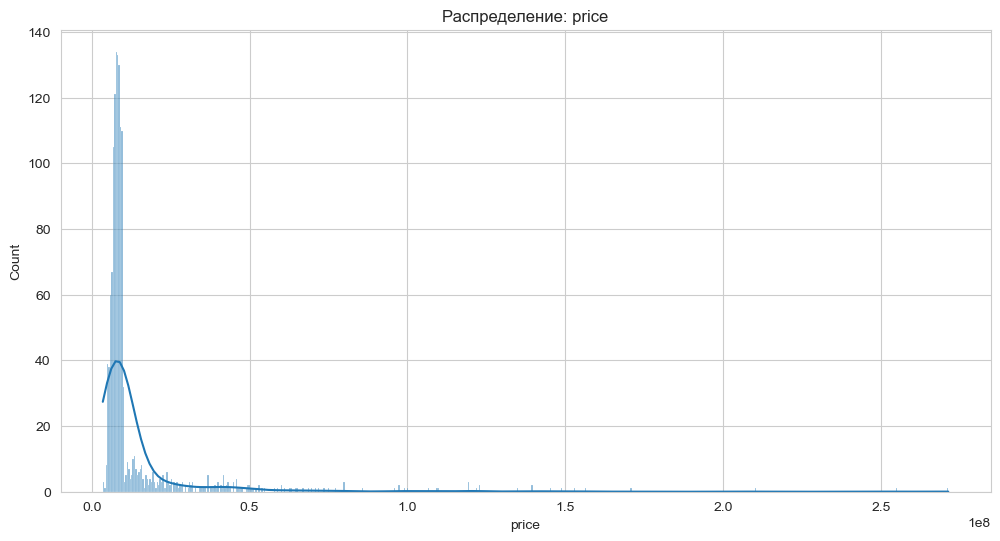

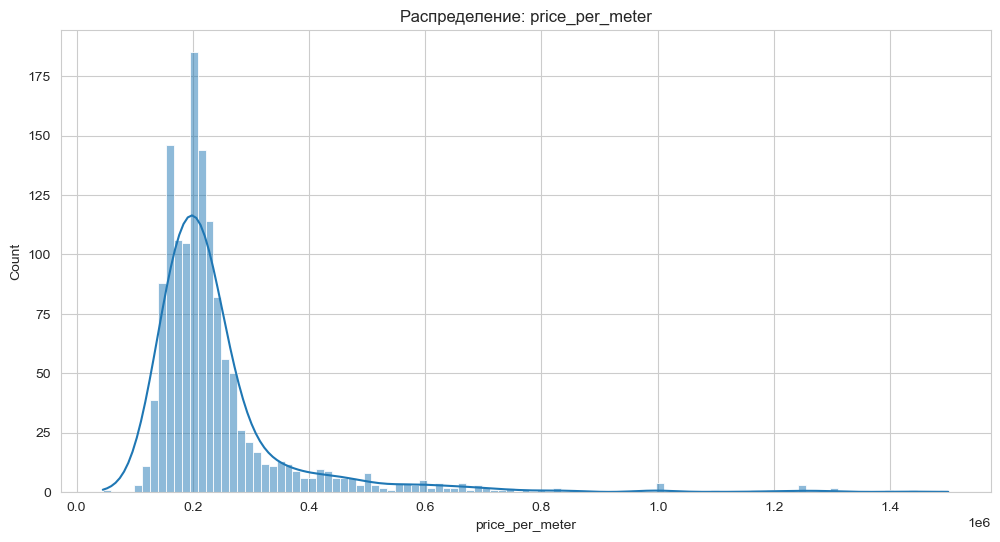

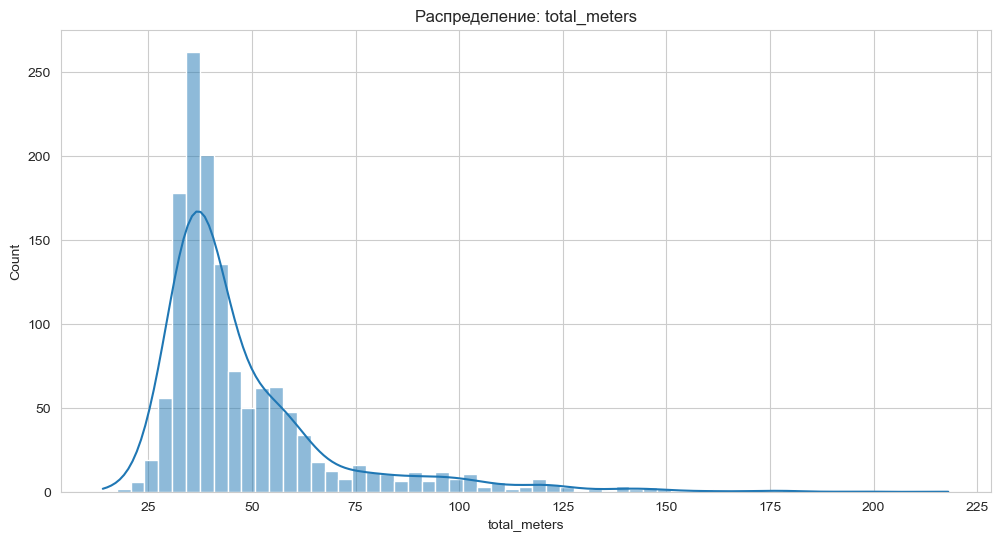

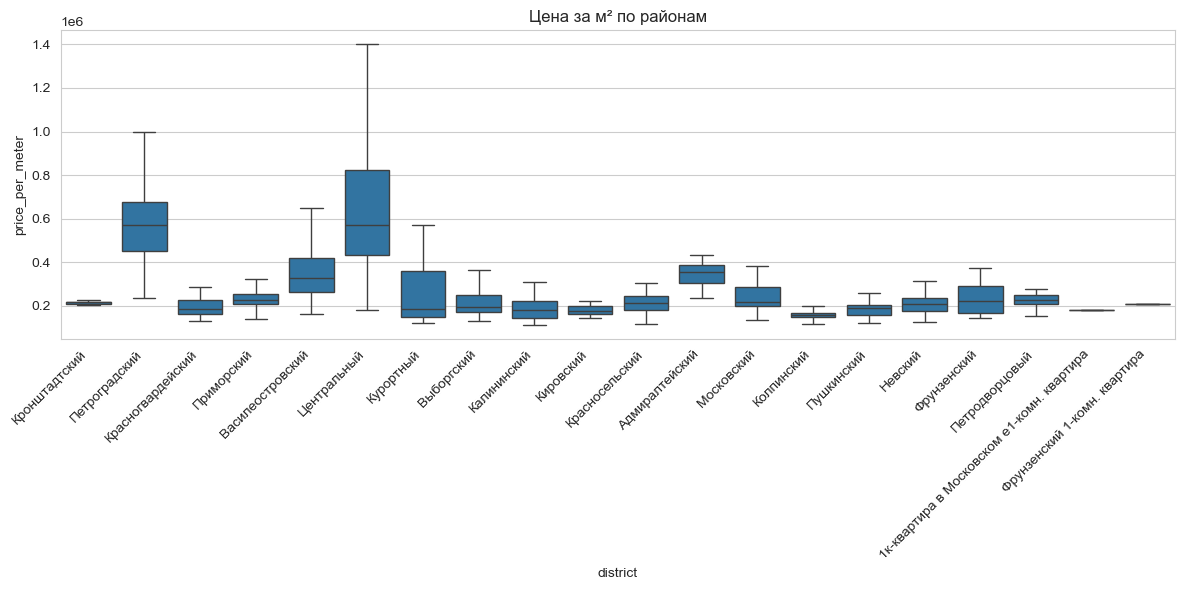

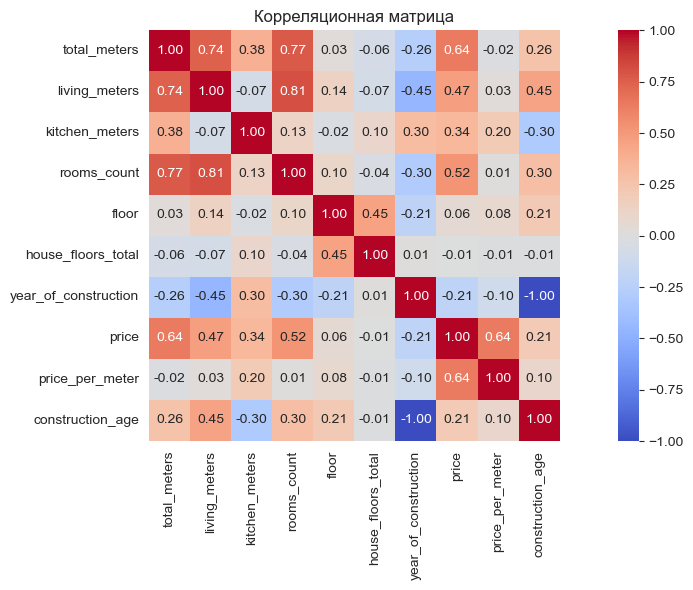

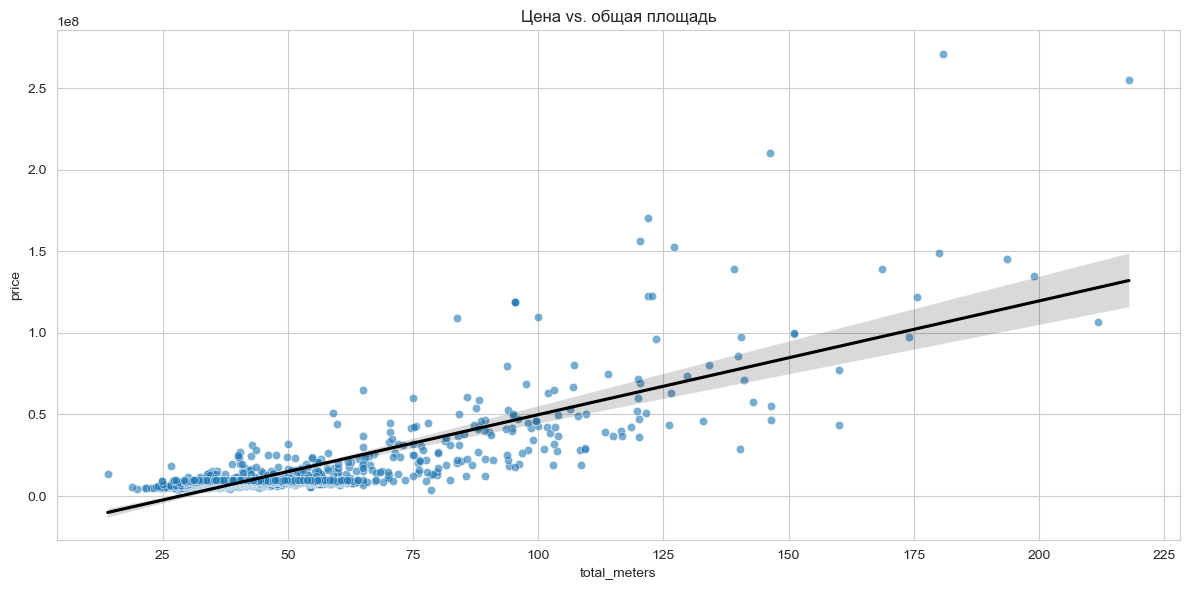

In [14]:
# EDA и предварительная обработка данных (включая добавление новых переменных - construction_age и price_per_meter)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
pd.options.display.float_format = "{:,.0f}".format

df = pd.read_excel("data_raw.xlsx")
print(f"Строк: {len(df):,}  |  Столбцов: {df.shape[1]}")
display(df.head())
df.info()

wanted_nums = [
    "total_meters", "living_meters", "kitchen_meters",
    "rooms", "floor", "floors_total",
    "year_of_construction", "price"
]
num_cols = [c for c in wanted_nums if c in df.columns]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

if {"price", "total_meters"}.issubset(df.columns):
    df["price_per_meter"] = df["price"] / df["total_meters"]

if "year_of_construction" in df.columns:
    df["construction_age"] = 2025 - df["year_of_construction"]

print("\nСтатистика:")
display(df.describe().T)

print("\nДоля пропусков, %:")
display((df.isna().mean() * 100).round(1).sort_values(ascending=False))

for col in ["price", "price_per_meter", "total_meters", "rooms"]:
    if col in df.columns:
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f"Распределение: {col}")
        plt.show()

if {"district", "price_per_meter"}.issubset(df.columns):
    sns.boxplot(data=df, x="district", y="price_per_meter", showfliers=False)
    plt.xticks(rotation=45, ha="right")
    plt.title("Цена за м² по районам")
    plt.tight_layout()
    plt.show()

corr = df.select_dtypes("number").corr("spearman")
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", square=True)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

if {"total_meters", "price"}.issubset(df.columns):
    sns.scatterplot(data=df, x="total_meters", y="price", alpha=0.6)
    sns.regplot(data=df, x="total_meters", y="price",
                scatter=False, color="black")
    plt.title("Цена vs. общая площадь")
    plt.tight_layout()
    plt.show()

obj_cols = df.select_dtypes("object").columns
df[obj_cols] = df[obj_cols].astype(str)

df.to_excel("data_clean.xlsx", index=False)